In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Read data

In [2]:
df = pd.read_csv("../data/respuestas.csv")
df.shape

(144, 15)

In [37]:
df.head().transpose()

,0,1,2,3,4
timestamp,3/12/2021 19:15:01,3/17/2021 21:12:19,3/18/2021 21:28:35,3/26/2021 22:14:29,4/19/2021 13:40:42
q_edad,10,9,10,9,9
q_genero,f,f,m,f,f
q_donde_compu,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa,a_donde_compu_casa
q_que_haces_compu,"a_que_haces_compu_videos, a_que_haces_compu_tarea",a_que_haces_compu_juegos,a_que_haces_compu_videos,"a_que_haces_compu_juegos, a_que_haces_compu_vi...","a_que_haces_compu_juegos, a_que_haces_compu_vi..."
q_donde_aprendiste_compu,a_donde_aprendiste_compu_casa,a_donde_aprendiste_compu_solo,a_donde_aprendiste_compu_escuela,"a_donde_aprendiste_compu_casa, a_donde_aprendi...",a_donde_aprendiste_compu_casa
q_que_celu_usas,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_propio,a_que_celu_usas_prestado,a_que_celu_usas_propio
q_que_haces_celu,"a_que_haces_celu_chat, a_que_haces_celu_videos...",a_que_haces_celu_redes,a_que_haces_celu_juegos,"a_que_haces_celu_chat, a_que_haces_celu_telefo...",a_que_haces_celu_chat
q_yt,a_yt_1compu,a_yt_1compu,a_yt_muchascompu,a_yt_nose,a_yt_celular
q_acceso_fotos,a_acceso_fotos_yoyotros,a_acceso_fotos_yo,a_acceso_fotos_yo,a_acceso_fotos_yoyotros,a_acceso_fotos_yo


# Descripción del grupo

A continuación se describe el grupo encuestado según distintas variables poblacionales. 

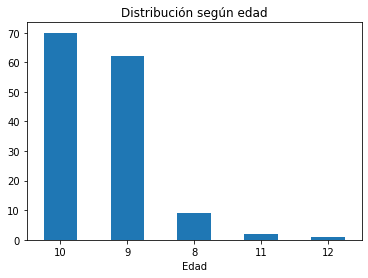

In [4]:
# Participantes por Edad

df["q_edad"].value_counts().plot.bar(rot=0)
plt.xlabel("Edad")
plt.title("Distribución según edad");

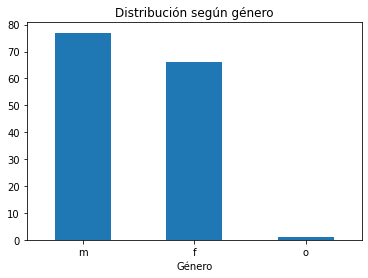

In [5]:
# Participantes por Género

df["q_genero"].value_counts().plot.bar(rot=0)
plt.xlabel("Género")
plt.title("Distribución según género");

Podemos ver que se trata de un grupo bastante homogéneo en cuanto a la edad, en tanto es el objeto de nuestro estudio el grupo comprendido por niños y niñas de alrededor de diez años. En tanto al género tenemos una buena distribución también, tratándose de un grupo muy parejo.

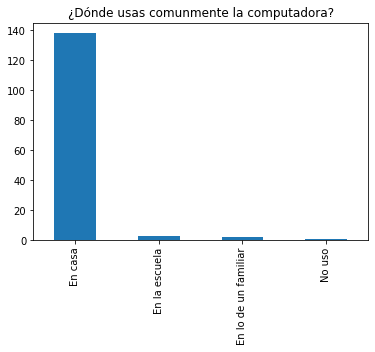

In [29]:
# En qué lugar usas más comunmente la computadora
positions = (0, 1, 2, 3)
labels = ("En casa", "En la escuela", "En lo de un familiar", "No uso")

df["q_donde_compu"].value_counts().plot.bar()
plt.title("¿Dónde usas comunmente la computadora?")
plt.xticks(positions, labels);

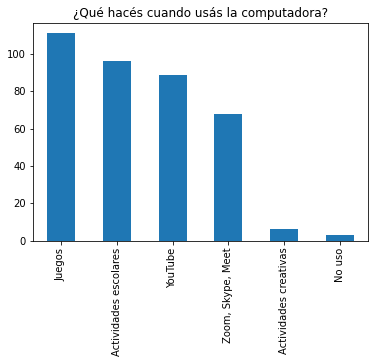

In [33]:
# ¿Qué hacés cuando usás la computadora (podés elegir más de una opción)?
positions = (0, 1, 2, 3, 4, 5)
labels = ("Juegos", "Actividades escolares", "YouTube", "Zoom, Skype, Meet", "Actividades creativas", "No uso")

df["q_que_haces_compu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar()
plt.title("¿Qué hacés cuando usás la computadora?");
plt.xticks(positions, labels);


Queda claro que la mayor parte de los participantes utilizan la computadora en su casa. Siendo que tanto este año como el anterior vivimos en un contexto de Pandemia, este resultado no resulta sorprendente.

Si cabe destacar que la mayor parte de los niños y niñas parecieran contar con una computadora en sus hogares, siendo tan solo uno de ellos quien respondió que no poseía una.

También les preguntamos para qué utilizan más comunmente la computadora. Les dimos la posibilidad de marcar más de una opción dentro de una serie de respuestas y al mismo tiempo, dejamos espacio disponible para poder completar con otras actividades que no estuvieran dentro de las que les habíamos propuesto.

Por otro lado, la mayoría utiliza la computadora para jugar juegos, siendo las siguientes actividades más usuales mirar videos en YouTube, realizar videollamadas utilizando Skype, Meet o Zoom y realizar actividades escolares. Nuevamente, esto tiene sentido siendo que durante todo el 2020 en Argentina hubo clases de manera virtual.

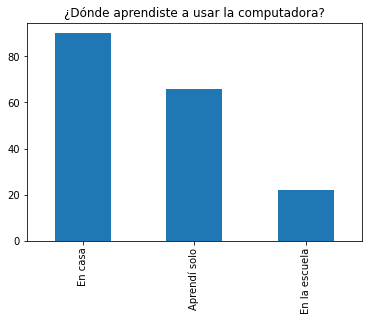

In [35]:
#¿Dónde aprendiste a usar la computadora? 

positions = (0, 1, 2)
labels = ("En casa", "Aprendí solo", "En la escuela")


df["q_donde_aprendiste_compu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar()
plt.title("¿Dónde aprendiste a usar la computadora?");

plt.xticks(positions, labels);


En cuanto a la forma en la que aprendieron a usar la computadora, podemos ver que las opciones más elegidas son _"Me enseñaron en mi casa (mis padres, hermanos u otro familiar)"_ y _"Aprendí solo"_. 

Podemos ver que la tendencia es claramente más orientada a la formación recibida en el hogar, tanto por la enseñanza directa por parte de la familia o bien tal vez por la observación o la experiencia indirecta, al ver a otros miembros de la familia. 

Esta hipótesis es respaldada por otros estudios anteriores, como por ejemplo el de Mertala [8] _“Young children's perceptions of ubiquitous computing and the Internet of Things”_ donde explica que el conocimiento de los chicos a los que ella entrevistó sobre las tecnologías se basa en el contacto que tuvieron con éstas a través de sus padres, hermanos u otras figuras del entorno familiar o escolar. 

De esta forma, esta percepción de haber "aprendido solos" podría tener raiz en este contacto indirecto.

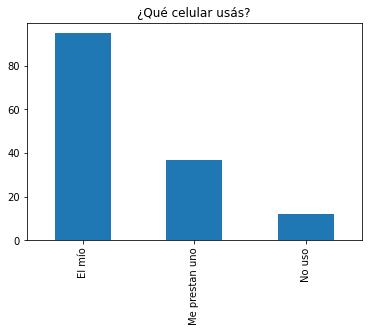

In [39]:
#¿Qué celular usás?

positions = (0, 1, 2)
labels = ("El mío", "Me prestan uno", "No uso")

df["q_que_celu_usas"].value_counts().plot.bar()
plt.title("¿Qué celular usás?")
plt.xticks(positions, labels);


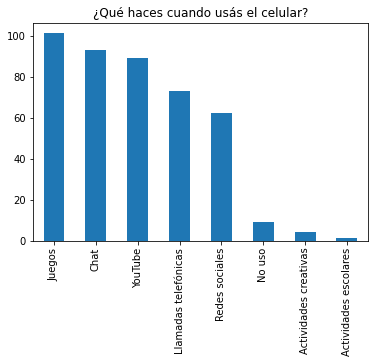

In [41]:
# Si usás celular: ¿qué haces cuando usás el celular? (podés elegir más de una opción)

positions = (0, 1, 2, 3, 4, 5, 6, 7)
labels = ("Juegos", "Chat", "YouTube", "Llamadas telefónicas", "Redes sociales", \
          "No uso", "Actividades creativas", "Actividades escolares")

df["q_que_haces_celu"].str.replace(" ", "").str.get_dummies(sep=',') \
    .sum().sort_values(ascending=False).plot.bar()
plt.title("¿Qué haces cuando usás el celular?");
plt.xticks(positions, labels);


Al indagar en la forma en que los chicos y chicas utilizan los celulares nos encontramos con que la gran mayoría cuenta con un dispositivo propio.

La actividad más realizada es nuevamente jugar juegos, pero se suma con mucha importancia también el chat (utilizando aplicaciones de mensajería tales como Whatsapp, Telegram, etc) y mirar videos en YouTube.

Es llamativo que haya aparecido "Llamadas telefónicas" como una actividad de una importancia considerable, aunque cabe preguntarse si habría que haber pedido que especifiquen si se referían videollamadas utilizando las aplicaciones anteriormente mencionada, y en tal caso la actividad "Chat" cobraría aún más relevancia.

Dentro de "Redes Sociales" se incluyen ejemplos como TikTok, Instagram y Facebook, aunque no les pedimos que especifiquen ninguna en particular. Sin embargo, sabemos por la consulta realizada previamente a la confección de la encuesta que realizamos a los referentes pedagógicos de la Fundación Sadosky que trabajan para el Plan Ceibal, que la red social elegida por sobre las otras es en estos momentos TikTok.

Por último, cabe destacar que "Actividades creativas" no fue una opción propuesta por nosotros en el cuestionario (tanto en esta pregunta como en la relacionada a las actividades realizadas con la computadora), sino que fue agregada por los chicos y chicas al momento de completar la encuesta. Dentro de este grupo, agrupamos respuestas que se referían a la edición de videos y fotos (tal vez para compartir en aplicaciones tales como TikTok o Instagram), escuchar música y escribir historias.

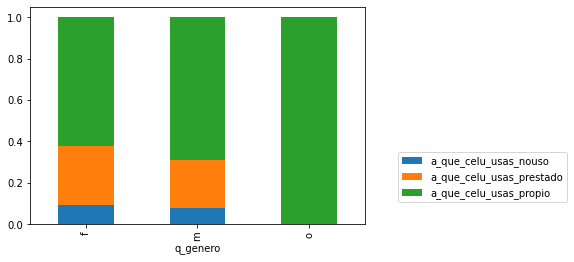

In [10]:
# idea: agrupar por una caracteristica y ver si hay un patron en las respuestas
counts = df.groupby("q_genero")["q_que_celu_usas"].value_counts().unstack()
counts.div(counts.sum(axis=1), axis=0).plot.bar(stacked=True)
plt.legend(loc=(1.1, 0.1));

In [11]:
(df[question_q1] != answer_q1).head(30)

NameError: name 'question_q1' is not defined

In [ ]:
# idea 2: calcular proporcion de missconcepions en cada pregunta
question_q1 = "¿Dónde se almacenan los videos que están en YouTube?"
answer_q1 = "En muchísimas computadoras (tantas que podrían llenar una cancha de fútbol)"
na_q1 = "No sé"
df["missconception_q1"] = (df[question_q1] != answer_q1) & (df[question_q1] != na_q1)
df["missconception_q1"].value_counts()

In [ ]:
question_2 = "¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?"
answer_q2 = "Yo y otras personas."
df["missconception_q2"] = df[question_2] != answer_q2
df["missconception_q2"].value_counts()

In [ ]:
question_3 = "Cuando le mando a una amiga una foto por WhatsApp..."
answer_q3 = "La foto ahora existe en WhatsApp y mi amiga la puede ver cuando mira nuestro chat."
df["missconception_q3"] = df[question_3] != answer_q3
df["missconception_q3"].value_counts()

In [ ]:
df[["missconception_q1", "missconception_q2", "missconception_q3"]].head()

In [ ]:
# chi square

In [ ]:
# exploratory data analysis
# cleaning, preprocessing => renombrar columnas, normalizar las respuestas (e.g. "no se." => "no sé")
# descriptive analysis (how many missconceptions, what are the questions that students failed the most, etc.)
# 0 y 10 missconception => barplot x: numero de missconceptions, y: cantidad de estudiantes

In [ ]:
df['num_missconception'] = df['missconception_q1'].astype('int') +\
                           df['missconception_q2'].astype('int') +\
                           df['missconception_q3'].astype('int')
df['num_missconception'].head()

In [ ]:
df['num_missconception'].value_counts().sort_index().plot.bar();